In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---------- **Data loading** ----------

In [2]:
data_file = '../dataset/lyrics_dataset.csv'

In [3]:
df = pd.read_csv(data_file, delimiter=',')

rows, cols = df.shape
print(f'Rows = {rows}')
print(f'Column = {cols}')

Rows = 218210
Column = 7


In [4]:
df.head(10)

,Unnamed: 0,index,song,year,artist,genre,lyrics
0,0,0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I'm gonna cut r...
1,1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...
2,2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,3,3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I If I wrote a book about ...
4,4,4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it's pop...
5,5,5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,I heard Church bells ringing I heard A choir s...
6,6,6,once-in-a-lifetime,2009,beyonce-knowles,Pop,This is just another day that I would spend Wa...
7,7,7,waiting,2009,beyonce-knowles,Pop,Waiting waiting waiting waiting Waiting waitin...
8,8,8,slow-love,2009,beyonce-knowles,Pop,I read all of the magazines while waiting aro...
9,9,9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,N n now honey You better sit down and look aro...


---------- **Genres distribution** ----------

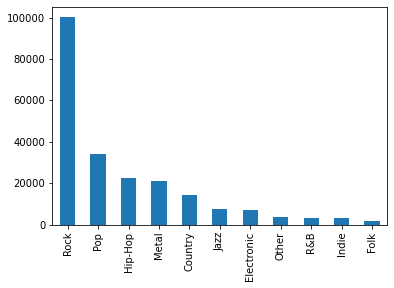

In [5]:
df['genre'].value_counts().plot.bar()

Remove songs which are in genre 'Other'

In [6]:
rows_before, _ = df.shape
df = df[df.genre != 'Other']
rows_now, _ = df.shape

print(f'Removed = {rows_before - rows_now}')

Removed = 3786


---------- **Word distribution** ----------

In [7]:
from nltk.corpus import stopwords

We have to make sure we ignore stop words which do not "contribute" much to meaning of the sentence. (Common words like 'I', 'are', etc.)

In [8]:
genres = ["Rock", "Pop", "Hip-Hop", "Metal", "Country", "Jazz", "Electronic", "R&B", "Indie", "Folk"]
genre_clrs = ['blue', 'green', 'gray', 'black', 'orange', 'purple', 'yellow', 'brown', 'lime', 'cyan']
top_N = 10

stop_words = set(stopwords.words('english'))
additional = ['you\'re', 'i\'m', 'she\'s', 'he\'s', 'it\'s']
stop_words.update(additional)

In [14]:
def print_word_hist(df, top_N, stop_words, color = 'purple', ax = None):
    top_words = pd.Series([w for w in ' '.join(df.lyrics).lower().split() if w not in stop_words]).value_counts()[:top_N]
    
    top_words.plot(kind = 'bar', color = color, ax = ax)

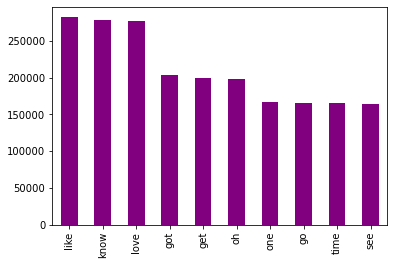

In [15]:
print_word_hist(df, top_N, stop_words) #all genres

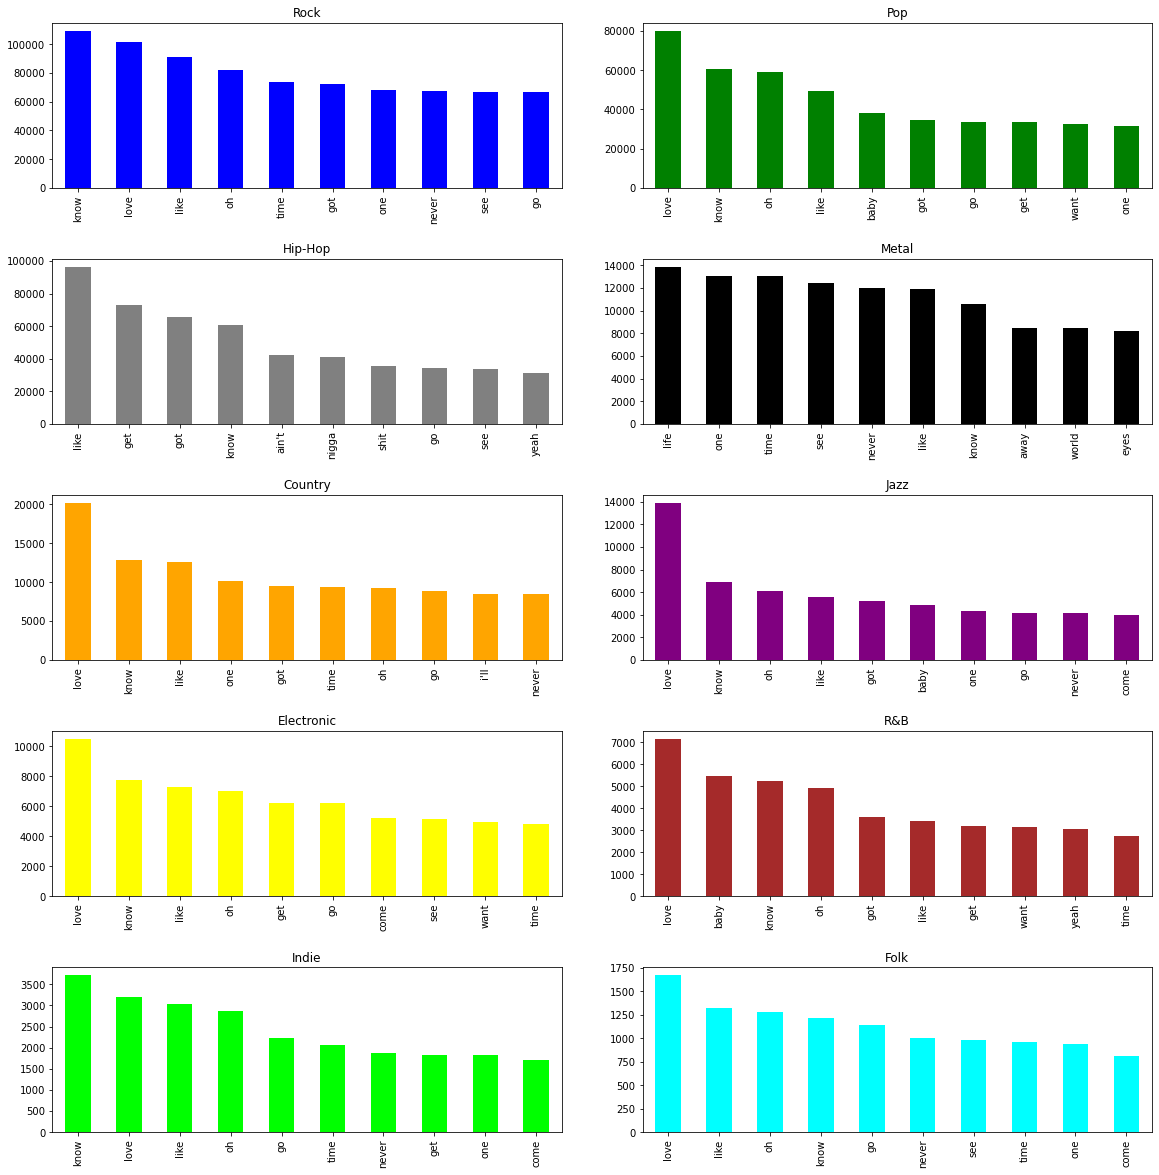

In [16]:
rows = 5
cols = 2

fig, axes = plt.subplots(figsize=(16,16), nrows=rows, ncols=cols)
fig.tight_layout(h_pad=5, w_pad=5)
i = 0
for row in range(rows):
    for col in range(cols):
        print_word_hist(df[df.genre == genres[i]], top_N, stop_words, color = genre_clrs[i], ax = axes[row, col])
        axes[row, col].title.set_text(genres[i])
        i += 1

---------- **Lyrics length** ----------

<Figure size 2304x2304 with 0 Axes>

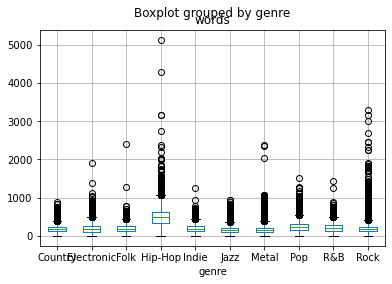

In [22]:
lens = df['lyrics'].str.count(' ').add(1)
df['words'] = lens

df.boxplot(column = 'words', by = 'genre')